## Load Data and Initial Grid Search

In [1]:
DATA_NAME = 'batch0approx1e5-agriVision-fourier-red' # size-name-transform-channel

In [2]:
import git
from pathlib import Path
import os

ROOT_DIR = Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
path_dict = dict(zip(['size', 'name', 'transform', 'channel'], DATA_NAME.split("-")))
CWD = os.path.join(ROOT_DIR, os.path.join("results", "case-studies", path_dict['name'], path_dict['transform'], path_dict['size'], path_dict['channel']))
assert CWD == os.getcwd()
Path(os.path.join(CWD, "CSVs")).mkdir(exist_ok=True)
Path(os.path.join(CWD, "plots")).mkdir(exist_ok=True)
Path(os.path.join(CWD, "cache")).mkdir(exist_ok=True)
Path(os.path.join(CWD, "groupCDFs")).mkdir(exist_ok=True)

GROUP = 'layer' if path_dict['transform'] == 'wavelet' else ('band' if path_dict['transform'] == 'fourier' else 'error')
CWD

'c:\\Users\\yashd\\Desktop\\hierarchical-bayesian-model-validation\\results\\case-studies\\agriVision\\fourier\\batch0approx1e5\\red'

In [3]:
os.chdir(os.path.join(ROOT_DIR, "utilities"))
from testing import * # If MATLAB is not installed, open utilities and set to False
from plotting import *
os.chdir(CWD)
np.random.seed(0)

In [ ]:
group_data_map = pd.read_pickle(os.path.join(ROOT_DIR, "transformed-data", f'{DATA_NAME}.pickle'))
group_total_samples = pd.read_pickle(os.path.join(ROOT_DIR, "transformed-data", f'{DATA_NAME}-size.pickle'))

GROUPS = np.arange(2, sorted(group_data_map)[-1] + 1)[::3]
cdfs_dir = os.path.join(ROOT_DIR, "results", "CDFs")
cdfs_list = [os.path.join(cdfs_dir, i) for i in os.listdir(cdfs_dir)]
all_cdfs = combine_pickles(cdfs_list[0])
for cdf_dir in cdfs_list[1:]:
    all_cdfs = all_cdfs | combine_pickles(cdf_dir)
    
# group_data_map = {g : group_data_map[g][::100] for g in GROUPS} # For quick testing purposes
group_total_samples

{2: 45000,
 3: 72000,
 4: 63000,
 5: 117000,
 6: 126000,
 7: 171000,
 8: 189000,
 9: 297000,
 10: 396000,
 11: 495000,
 12: 648000,
 13: 882000,
 14: 1134000,
 15: 1539000,
 16: 1953000,
 17: 2574000,
 18: 3456000,
 19: 4563000,
 20: 5967000,
 21: 8010000,
 22: 10395000,
 23: 13887000,
 24: 18297000,
 25: 24057000,
 26: 31968000,
 27: 42183000,
 28: 55764000,
 29: 73701000,
 30: 97326000}

In [ ]:
''' Only need to run commented code once'''
all_cdfs_df = create_kurt_var_ksstat_df(all_cdfs)
coarse_cdf_df = all_cdfs_df[(np.round(all_cdfs_df['r'], 0) == all_cdfs_df['r']) & (np.round(all_cdfs_df['eta'], 0) == all_cdfs_df['eta'])]
var_values_dict = dict()
kurt_values_dict = dict()
master_df = pd.DataFrame(columns=[GROUP]).set_index(GROUP)
all_cdfs_df.head()

c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:817: RuntimeWarning: invalid value encountered in scalar divide
  var_prior = scale * scipy.special.gamma(beta + 1/r)/scipy.special.gamma(beta)
c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:822: RuntimeWarning: overflow encountered in scalar multiply
  kurtosis = 3*scipy.special.gamma(beta + 2/r)*scipy.special.gamma(beta)/scipy.special.gamma(beta+1/r)**2
c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:822: RuntimeWarning: overflow encountered in scalar power
  kurtosis = 3*scipy.special.gamma(beta + 2/r)*scipy.special.gamma(beta)/scipy.special.gamma(beta+1/r)**2
c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:822: RuntimeWarning: invalid value encountered in scalar divide
  kurtosis = 3*scipy.special.gamma(beta + 2/r)*scipy.special.gamma(beta)/scipy.special.gamma(beta+1/r)**2


(r,eta),cdf     r  eta  \
0  ((0.02, -1.4), <scipy.interpolate._fitpack2.In...  0.02 -1.4   
1  ((0.02, -1.3), <scipy.interpolate._fitpack2.In...  0.02 -1.3   
2  ((0.02, -1.2), <scipy.interpolate._fitpack2.In...  0.02 -1.2   
3  ((0.02, -1.1), <scipy.interpolate._fitpack2.In...  0.02 -1.1   
4  ((0.02, -1.0), <scipy.interpolate._fitpack2.In...  0.02 -1.0   

                                                 cdf      variance  \
0  <scipy.interpolate._fitpack2.InterpolatedUniva...  9.618487e+69   
1  <scipy.interpolate._fitpack2.InterpolatedUniva...  3.821735e+74   
2  <scipy.interpolate._fitpack2.InterpolatedUniva...  1.455488e+78   
3  <scipy.interpolate._fitpack2.InterpolatedUniva...  1.406735e+81   
4  <scipy.interpolate._fitpack2.InterpolatedUniva...  5.331443e+83   

       kurtosis  
0  1.391529e+25  
1  8.172634e+21  
2  4.131785e+19  
3  6.947275e+17  
4  2.562075e+16

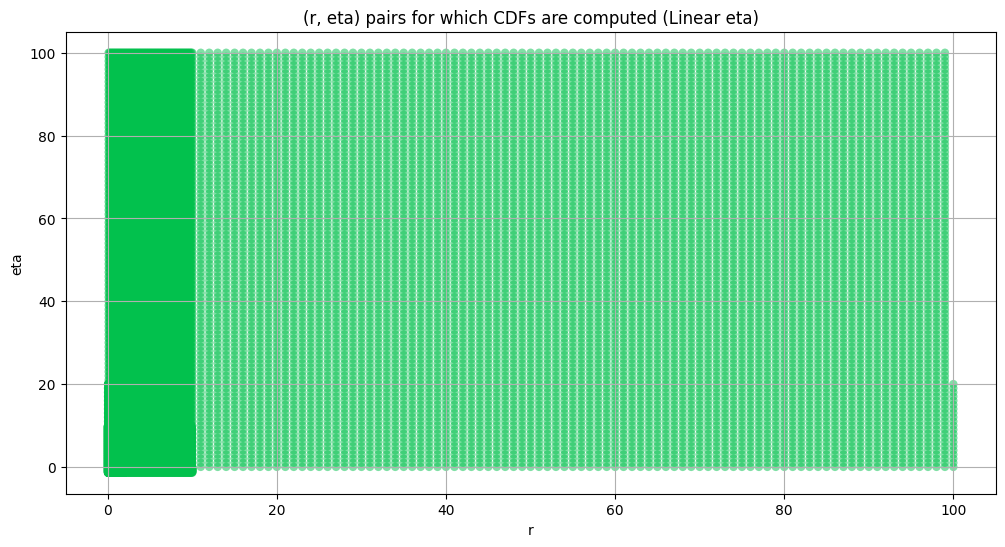

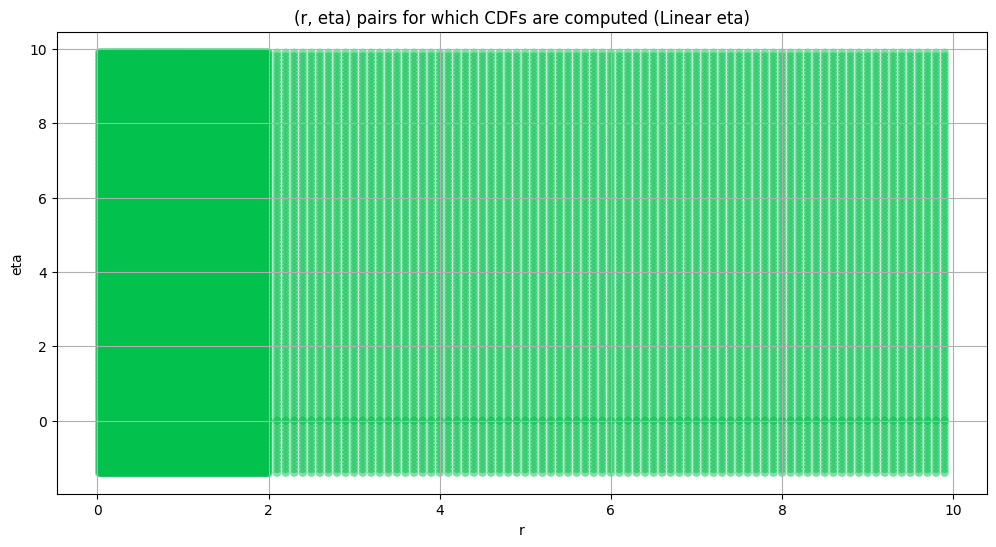

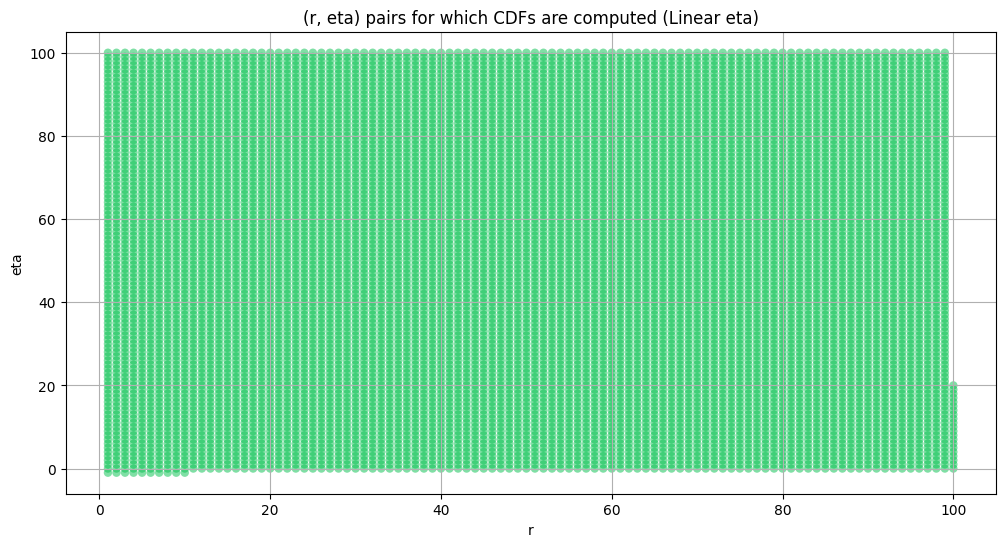

c:\Users\yashd\.conda\envs\hbmv_backup2\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
c:\Users\yashd\.conda\envs\hbmv_backup2\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


r           eta       variance      kurtosis
count  51883.000000  51883.000000   5.188300e+04  5.064200e+04
mean      11.990701     21.476312            inf           inf
std       22.639851     28.237512            inf           NaN
min        0.020000     -1.400000   0.000000e+00  4.787254e-04
25%        1.000000      3.000000   9.882555e-01  1.513901e-02
50%        1.970000      7.600000   1.482803e+00  1.950077e-01
75%        8.100000     32.000000   5.742021e+00  6.565170e-01
max      100.000000    100.000000  1.797693e+308           inf

In [ ]:
create_scatter_plot(all_cdfs_df)
create_scatter_plot(all_cdfs_df[(all_cdfs_df['r'] < 10) & (all_cdfs_df['eta'] < 10)])
create_scatter_plot(coarse_cdf_df)

all_cdfs_df.describe()

In [ ]:
n_bootstrap = int(1e5)
bootstrap_size = int(1e4)
ci = 0.99

In [ ]:
''' Only need to run commented code once'''    
for group in  GROUPS:
    print(f'{GROUP.capitalize()} {group}')
    obs_var, var_lower, var_upper, var_values_dict[group] = bootstrap_metric(group_data_map[group], 
                                                                             n_bootstrap=n_bootstrap, 
                                                                             bootstrap_size=min(group_data_map[group].size, bootstrap_size), 
                                                                             metric= np.var, 
                                                                             ci=ci)
    obs_kurt, kurt_lower, kurt_upper, kurt_values_dict[group] = bootstrap_metric(group_data_map[group], 
                                                                                 n_bootstrap=n_bootstrap, 
                                                                                 bootstrap_size=min(group_data_map[group].size, bootstrap_size), 
                                                                                 metric= stats.kurtosis, ci=ci)  
    master_df.loc[group, 'obs_var'], master_df.loc[group, 'var_lower'], master_df.loc[group, 'var_upper'] = obs_var, var_lower, var_upper
    master_df.loc[group, 'obs_kurt'], master_df.loc[group, 'kurt_lower'], master_df.loc[group, 'kurt_upper'] = obs_kurt, kurt_lower, kurt_upper
    master_df.loc[group, 'total_samples'] = group_total_samples[group]

master_df.to_csv(os.path.join(CWD, "CSVs", f'initial_grid_bootstrap{n_bootstrap}_{bootstrap_size}_ci{ci}.csv'))

master_df = pd.read_csv(os.path.join(CWD, "CSVs", f'initial_grid_bootstrap{n_bootstrap}_{bootstrap_size}_ci{ci}.csv'), index_col=GROUP)
var_kurt_df = pd.read_csv(os.path.join(CWD, "CSVs", f'initial_grid_bootstrap{n_bootstrap}_{bootstrap_size}_ci{ci}.csv'), index_col=GROUP)
master_df

Layer 2


 19%|█▉        | 19176/100000 [01:08<04:47, 280.85it/s]


KeyboardInterrupt: 

####
Layer  2


100%|██████████| 51883/51883 [00:08<00:00, 5774.54it/s]


Finding Minimum after computing 51883 CDFs
Number of samples: 3180, Without approximation : 3180.0


/Users/brandonmarks/Desktop/Research Materials/hierarchical-bayesian-model-validation/utilities/testing.py:842: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)


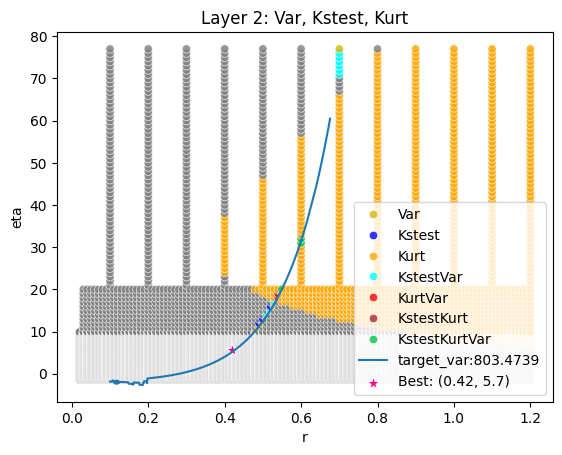

####
Layer  3


100%|██████████| 51883/51883 [00:28<00:00, 1793.04it/s]


Finding Minimum after computing 51883 CDFs
Number of samples: 12720, Without approximation : 12720.0


/Users/brandonmarks/Desktop/Research Materials/hierarchical-bayesian-model-validation/utilities/testing.py:842: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)


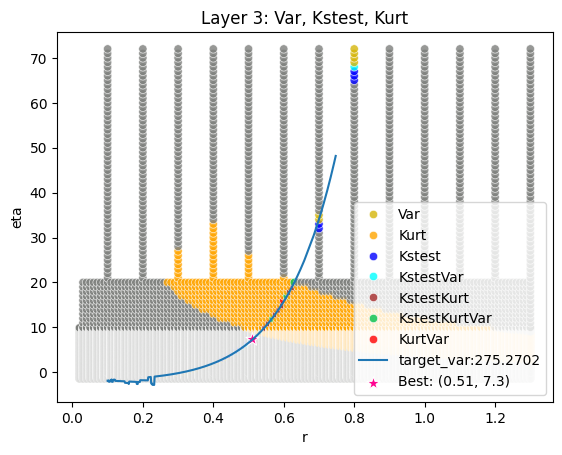

####
Layer  4


100%|██████████| 51883/51883 [01:37<00:00, 534.33it/s]


Finding Minimum after computing 51883 CDFs
Number of samples: 50880, Without approximation : 50880.0


/Users/brandonmarks/Desktop/Research Materials/hierarchical-bayesian-model-validation/utilities/testing.py:842: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)


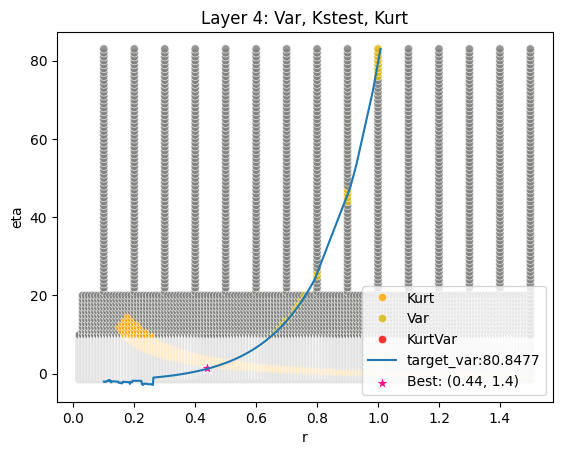

####
Layer  5


100%|██████████| 51883/51883 [02:54<00:00, 297.99it/s]


Finding Minimum after computing 51883 CDFs
Number of samples: 100000, Without approximation : 203520.0


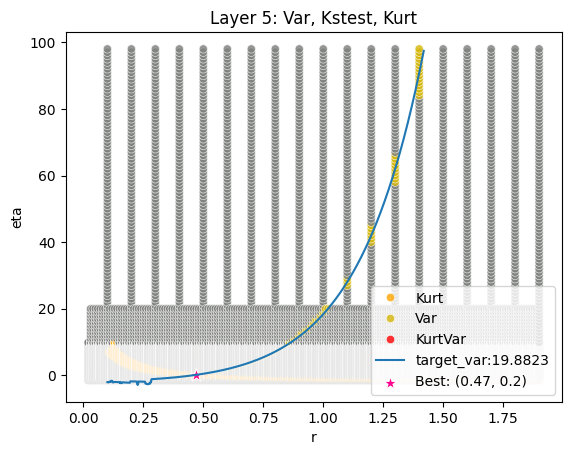

####
Layer  6


100%|██████████| 51883/51883 [03:08<00:00, 275.60it/s]


Finding Minimum after computing 51883 CDFs
Number of samples: 100000, Without approximation : 814080.0


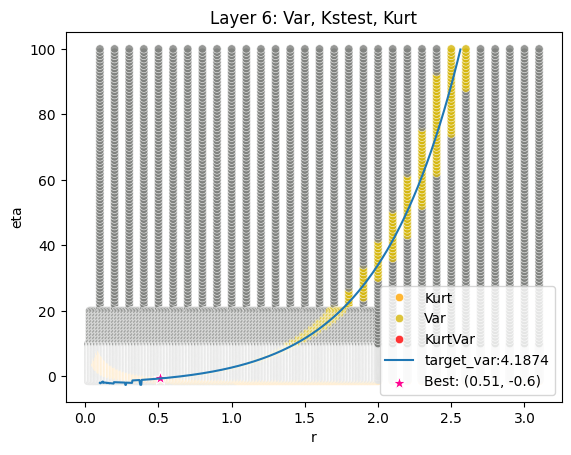

####
Layer  7


100%|██████████| 51883/51883 [03:06<00:00, 278.71it/s]


Finding Minimum after computing 51883 CDFs
Number of samples: 100000, Without approximation : 3256320.0


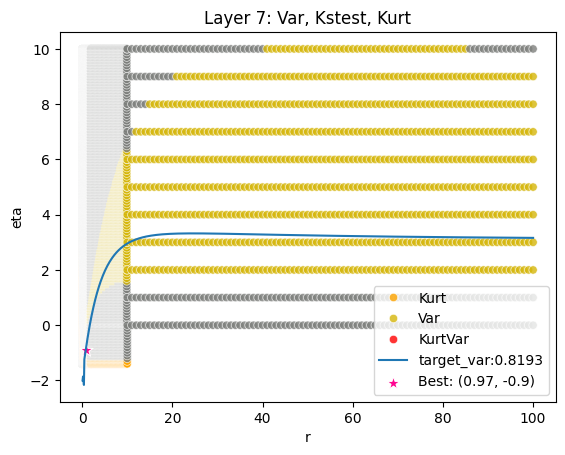

####
Layer  8


100%|██████████| 51883/51883 [03:05<00:00, 279.45it/s]


Finding Minimum after computing 51883 CDFs
Number of samples: 100000, Without approximation : 13025280.0


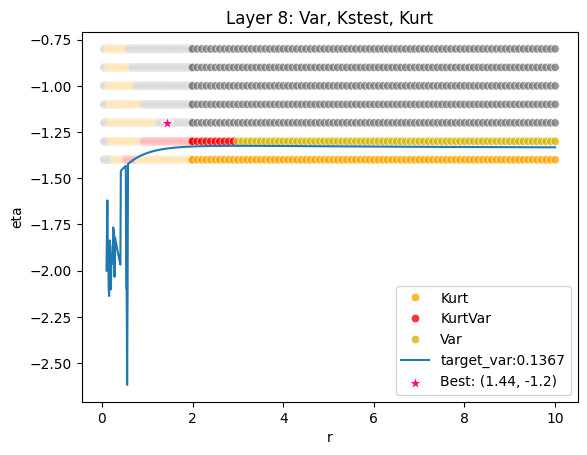

obs_var   var_lower   var_upper    obs_kurt  kurt_lower  kurt_upper  \
layer                                                                           
2      803.473892  751.378924  857.028528    0.094996   -0.097312    0.299754   
3      275.270192  264.590167  286.288690    0.374403    0.219221    0.546058   
4       80.847728   77.046186   84.706154    1.357251    1.030759    1.855357   
5       19.882305   18.762781   21.056150    3.074957    2.230657    5.079245   
6        4.187365    3.884993    4.587161    7.592764    3.861297   29.028659   
7        0.819285    0.747353    0.916054   13.123555    6.050411   48.182214   
8        0.136744    0.117431    0.211746  172.661568    8.088640  756.942474   

       total_samples  initial_r  initial_eta  kstest_stat_initial  \
layer                                                               
2             3180.0       0.42          5.7             0.018069   
3            12720.0       0.51          7.3             0.004615   
4            50880.0       0.44          1.4             0.006270   
5           203520.0       0.47          0.2             0.005236   
6           814080.0       0.51         -0.6             0.004349   
7          3256320.0       0.97         -0.9             0.010413   
8         13025280.0       1.44         -1.2             0.051520   

       kstest_stat_cutoff_0.05  
layer                           
2                     0.024030  
3                     0.012029  
4                     0.006018  
5                     0.003010  
6                     0.001505  
7                     0.000753  
8                     0.000376

In [ ]:
''' Only need to run commented code once'''
sorted_params = sorted(all_cdfs)
group_cdf_df_dict = dict()

for i, group in enumerate(GROUPS):
    print(f"####\n{GROUP.capitalize()} ", group)
    sample = group_data_map[group]
    group_cdf_df = all_cdfs_df.copy()
    ksstats, initial_param, min_stat = gridsearch(sample, all_cdfs, debug=True)
    master_df.loc[group, 'initial_r'], master_df.loc[group, 'initial_eta'] = initial_param
    print(f"Number of samples: {sample.size}, Without approximation : {master_df.loc[group, 'total_samples']}")
    master_df.loc[group, 'kstest_stat_initial'] = min_stat
    cutoff = stats.kstwo(n=master_df.loc[group, 'total_samples']).isf(0.05)
    master_df.loc[group, 'kstest_stat_cutoff_0.05'] = cutoff

    group_cdf_df = add_tests_to_df(cdfs_df = group_cdf_df, group = group, var_kurt_df = master_df, ksstats = ksstats)
    
    group_cdf_df_dict[group] = group_cdf_df
    cols = ['pass_var', 'pass_kstest', 'pass_kurt']

    fig = combo_test_plot(group_cdf_df_dict[group], cols, 
                          plot_name=f"{GROUP.capitalize()} {group}: {', '.join([col[5:].capitalize() for col in cols])}", 
                          target_var = master_df.loc[group, 'obs_var'],
                          best_param = initial_param)
    
    fig.figure.savefig(os.path.join(CWD, "plots", f"full_grid_search_combo_plot_layer{group}.jpg"), bbox_inches = 'tight', dpi=600)

    # Optional: Create plots of bootstrapped variance and kurtosis for varying confidence intervals
    # fig_var = create_ci_scatter_plot(group_cdf_df_dict[group], var_values_dict, metric='variance', group=group)
    # fig_kurt = create_ci_scatter_plot(group_cdf_df_dict[group], kurt_values_dict, metric='kurtosis', group=group)

    # fig_var.savefig(os.path.join(CWD, "plots", f"ci_scatter_variance_{GROUP}_{group}_bootstrap{n_bootstrap}.jpg"), bbox_inches='tight')
    # plt.close(fig_var)
    # fig_kurt.savefig(os.path.join(CWD, "plots", f"ci_scatter_variance_{GROUP}_{group}_bootstrap{n_bootstrap}.jpg"), bbox_inches='tight')
    # plt.close(fig_kurt)

master_df.to_csv(os.path.join(CWD, "CSVs", "master_df_combo.csv"))
pd.to_pickle(group_cdf_df_dict, os.path.join(CWD, "cache", "group_cdf_df_dict_full.pickle"))

group_cdf_df_dict = pd.read_pickle(os.path.join(CWD, "cache", "group_cdf_df_dict_full.pickle"))
master_df = pd.read_csv(os.path.join(CWD, "CSVs", "master_df_combo.csv"), index_col=GROUP)
master_df

In [ ]:
''' Only need to run commented code once'''
best_params_eta0 = []
for i, group in enumerate(GROUPS):
    if master_df.loc[group, 'initial_eta'] != 0:
        sample = group_data_map[group]
        group_cdf = all_cdfs_df[all_cdfs_df['eta'] == 0]
        cdfs_dict = {i[0]:i[1] for i in group_cdf['(r,eta),cdf']}
        ksstats, best_param_eta0, kstest_stat_eta0 = gridsearch(sample, cdfs_dict, debug=True)
        best_params_eta0.append(best_param_eta0[0])
        master_df.loc[group, 'kstest_stat_eta0'] = kstest_stat_eta0
    else:
        master_df.loc[group, 'kstest_stat_eta0'] = master_df.loc[group, 'kstest_stat_initial']
        best_params_eta0.append(master_df.loc[group, 'initial_r'])
master_df['best_r_eta0'] = best_params_eta0
master_df.to_csv(os.path.join(CWD, "CSVs", "master_df_eta0.csv"))

master_df = pd.read_csv(os.path.join(CWD, "CSVs", "master_df_eta0.csv"), index_col=GROUP)
master_df

100%|██████████| 369/369 [00:00<00:00, 865.27it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:00<00:00, 1264.84it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:00<00:00, 518.65it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:01<00:00, 283.56it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:01<00:00, 282.02it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:01<00:00, 282.07it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:01<00:00, 288.28it/s]

Finding Minimum after computing 369 CDFs


obs_var   var_lower   var_upper    obs_kurt  kurt_lower  kurt_upper  \
layer                                                                           
2      803.473892  751.378924  857.028528    0.094996   -0.097312    0.299754   
3      275.270192  264.590167  286.288690    0.374403    0.219221    0.546058   
4       80.847728   77.046186   84.706154    1.357251    1.030759    1.855357   
5       19.882305   18.762781   21.056150    3.074957    2.230657    5.079245   
6        4.187365    3.884993    4.587161    7.592764    3.861297   29.028659   
7        0.819285    0.747353    0.916054   13.123555    6.050411   48.182214   
8        0.136744    0.117431    0.211746  172.661568    8.088640  756.942474   

       total_samples  initial_r  initial_eta  kstest_stat_initial  \
layer                                                               
2             3180.0       0.42          5.7             0.018069   
3            12720.0       0.51          7.3             0.004615   
4            50880.0       0.44          1.4             0.006270   
5           203520.0       0.47          0.2             0.005236   
6           814080.0       0.51         -0.6             0.004349   
7          3256320.0       0.97         -0.9             0.010413   
8         13025280.0       1.44         -1.2             0.051520   

       kstest_stat_cutoff_0.05  kstest_stat_eta0  best_r_eta0  
layer                                                          
2                     0.024030          0.060346         0.26  
3                     0.012029          0.037012         0.29  
4                     0.006018          0.023319         0.34  
5                     0.003010          0.005653         0.44  
6                     0.001505          0.020507         0.74  
7                     0.000753          0.082284         6.10  
8                     0.000376          0.227351         6.00

In [ ]:
def simple_add_cdfs(r_range, eta_range, dir, folder_name = '', n_samples = 500, tail_bound = 0.01, tail_percent = 0.1, enforce_assert=True, return_assert = False, debug=False):

    if folder_name == '':
        folder_name = f'r{round_to_sigfigs(min(r_range))}to{round_to_sigfigs(max(r_range))}_eta{round_to_sigfigs(min(eta_range))}to{round_to_sigfigs(max(eta_range))}'

    FOLDER_PATH = os.path.join(dir, folder_name)

    if os.path.isdir(FOLDER_PATH):
        cdfs_completed = combine_pickles(FOLDER_PATH)
        if debug:
            print("CDFs completed:", len(cdfs_completed))
    else:
        Path(os.path.join(os.getcwd(), FOLDER_PATH)).mkdir()
        cdfs_completed = dict()

    n = len(r_range)*len(eta_range)
    finished = len(cdfs_completed)
    cnt = len(cdfs_completed)
    for r in r_range:
        r_cdf = dict()
        r = round_to_sigfigs(r)
        for eta in eta_range:
            eta = round_to_sigfigs(eta)
            if ((r, eta) in cdfs_completed) and cdfs_completed[(r, eta)]:
                continue
            cnt += 1
            if debug:
                print(f'{(r, eta)}, {cnt} of {n + finished}')
            if cnt % 50 == 0:
                print(f'{(r, eta)}, {cnt} of {n + finished}')

            computed_cdf = compute_prior_cdf(r = r, eta = eta, method = 'gamma_cdf', n_samples = n_samples, tail_percent = tail_percent, tail_bound = tail_bound, 
                                             enforce_assert=enforce_assert, return_assert=return_assert, debug=debug)
            r_cdf[(r, eta)] = computed_cdf
        if r_cdf:
            sorted_r_cdf = [i[1] for i in sorted(r_cdf)]
            min_eta, max_eta = round_to_sigfigs(min(sorted_r_cdf), 6), round_to_sigfigs(max(sorted_r_cdf), 6)
            pkl_path = os.path.join(FOLDER_PATH, f'r{r}_eta{min_eta}to{max_eta}.pickle')
            pd.to_pickle(r_cdf, pkl_path)
        else:
            if debug:
                print(f"Skipped {r} entirely")

    if debug:
        print(f'You can find the CDFs here: {os.path.join(os.getcwd(), FOLDER_PATH)}')

Layer 2
(0.412, 5.69), 50 of 470
(0.414, 5.79), 100 of 520
(0.417, 5.69), 150 of 570
(0.419, 5.79), 200 of 620
(0.422, 5.69), 250 of 670
(0.424, 5.79), 300 of 720
(0.427, 5.69), 350 of 770
(0.429, 5.79), 400 of 820


100%|██████████| 420/420 [00:00<00:00, 4362.00it/s]


Finding Minimum after computing 420 CDFs
Iter 1 layer 2 best parameters: ((0.42, 5.68), 0.017541840618859696)
(0.4191, 5.681), 450 of 870
(0.4194, 5.671), 500 of 920
(0.4196, 5.681), 550 of 970
(0.4199, 5.671), 600 of 1020
(0.4201, 5.683), 650 of 1070
(0.4204, 5.673), 700 of 1120
(0.4206, 5.683), 750 of 1170
(0.4209, 5.673), 800 of 1220


100%|██████████| 834/834 [00:00<00:00, 7029.14it/s]


Finding Minimum after computing 834 CDFs
Iter 2 layer 2 best parameters: ((0.42, 5.679), 0.017519866326516365)


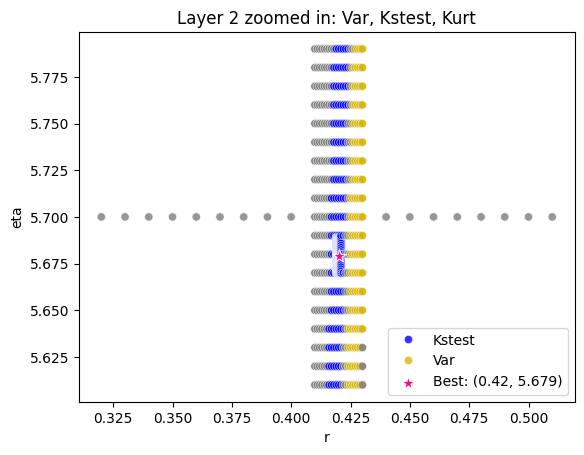

Layer 3
(0.502, 7.29), 50 of 470
(0.504, 7.39), 100 of 520
(0.507, 7.29), 150 of 570
(0.509, 7.39), 200 of 620
(0.512, 7.29), 250 of 670
(0.514, 7.39), 300 of 720
(0.517, 7.29), 350 of 770
(0.519, 7.39), 400 of 820


100%|██████████| 420/420 [00:00<00:00, 2024.48it/s]


Finding Minimum after computing 420 CDFs
Iter 1 layer 3 best parameters: ((0.509, 7.22), 0.004263263762185443)
(0.5081, 7.221), 450 of 870
(0.5084, 7.211), 500 of 920
(0.5086, 7.221), 550 of 970
(0.5089, 7.211), 600 of 1020
(0.5091, 7.223), 650 of 1070
(0.5094, 7.213), 700 of 1120
(0.5096, 7.223), 750 of 1170
(0.5099, 7.213), 800 of 1220


100%|██████████| 834/834 [00:00<00:00, 2031.15it/s]


Finding Minimum after computing 834 CDFs
Iter 2 layer 3 best parameters: ((0.5089, 7.211), 0.004221089215717844)


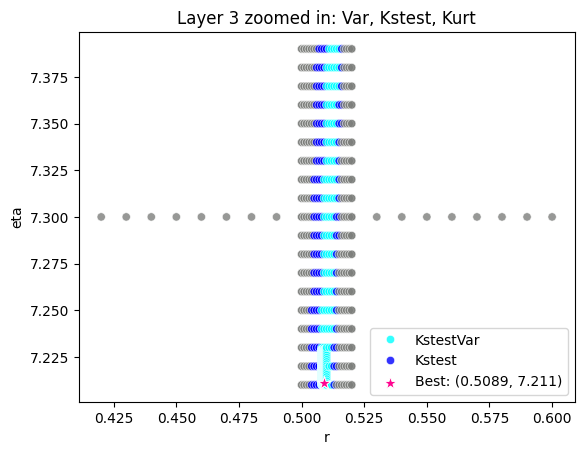

Layer 4
(0.432, 1.37), 50 of 491
(0.434, 1.45), 100 of 541
(0.437, 1.32), 150 of 591
(0.439, 1.4), 200 of 641
(0.441, 1.48), 250 of 691
(0.444, 1.35), 300 of 741
(0.446, 1.43), 350 of 791
(0.449, 1.3), 400 of 841


100%|██████████| 441/441 [00:00<00:00, 580.24it/s]


Finding Minimum after computing 441 CDFs
Iter 1 layer 4 best parameters: ((0.436, 1.31), 0.005315234043698491)
(0.435, 1.309), 450 of 891
(0.4352, 1.319), 500 of 941
(0.4355, 1.306), 550 of 991
(0.4357, 1.314), 600 of 1041
(0.436, 1.302), 650 of 1091
(0.4362, 1.312), 700 of 1141
(0.4364, 1.32), 750 of 1191
(0.4367, 1.307), 800 of 1241
(0.4369, 1.315), 850 of 1291


100%|██████████| 873/873 [00:07<00:00, 121.74it/s]


Finding Minimum after computing 873 CDFs
Iter 2 layer 4 best parameters: ((0.4354, 1.3), 0.005286301716882269)


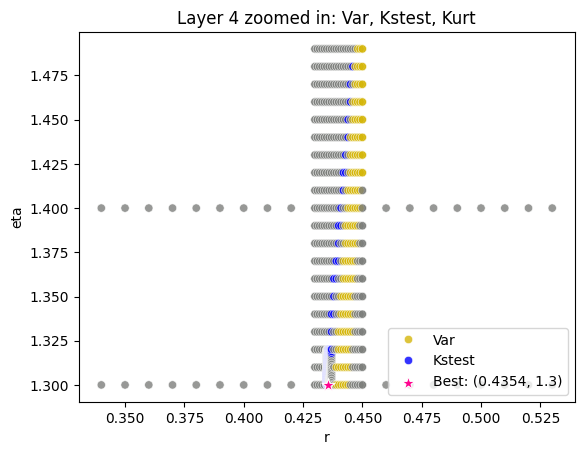

Layer 5
(0.462, 0.17), 50 of 491
(0.464, 0.25), 100 of 541
(0.467, 0.12), 150 of 591
(0.469, 0.2), 200 of 641
(0.471, 0.28), 250 of 691
(0.474, 0.15), 300 of 741
(0.476, 0.23), 350 of 791
(0.479, 0.1), 400 of 841


100%|██████████| 441/441 [00:02<00:00, 184.99it/s]


Finding Minimum after computing 441 CDFs
Iter 1 layer 5 best parameters: ((0.46, 0.12), 0.0038663879283301616)
(0.459, 0.118), 450 of 891
(0.4592, 0.126), 500 of 941
(0.4595, 0.113), 550 of 991
(0.4597, 0.121), 600 of 1041
(0.4599, 0.129), 650 of 1091
(0.4602, 0.119), 700 of 1141
(0.4604, 0.127), 750 of 1191
(0.4607, 0.114), 800 of 1241
(0.4609, 0.122), 850 of 1291


100%|██████████| 876/876 [00:05<00:00, 171.47it/s]


Finding Minimum after computing 876 CDFs
Iter 2 layer 5 best parameters: ((0.4591, 0.11), 0.0035957901663448144)
(0.45909, 0.10992), 900 of 1341
(0.45909, 0.11), 950 of 1391
(0.45909, 0.11008), 1000 of 1441
(0.4591, 0.10997), 1050 of 1491
(0.4591, 0.11008), 1100 of 1541
(0.4591, 0.10997), 1150 of 1591
(0.4591, 0.11008), 1200 of 1641
(0.45911, 0.10995), 1250 of 1691
(0.45911, 0.11003), 1300 of 1741


100%|██████████| 938/938 [00:04<00:00, 191.04it/s]


Finding Minimum after computing 938 CDFs
Iter 3 layer 5 best parameters: ((0.4591, 0.10991), 0.003592408525127433)


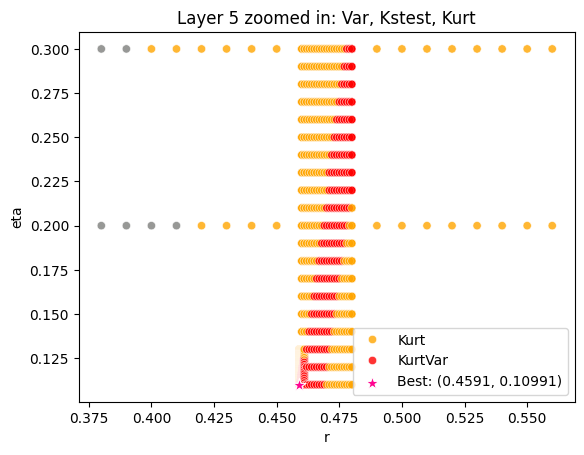

Layer 6
(0.502, -0.61), 50 of 470
(0.504, -0.51), 100 of 520
(0.507, -0.61), 150 of 570
(0.509, -0.51), 200 of 620
(0.512, -0.61), 250 of 670
(0.514, -0.51), 300 of 720
(0.517, -0.61), 350 of 770
(0.519, -0.51), 400 of 820


100%|██████████| 420/420 [00:02<00:00, 186.51it/s]


Finding Minimum after computing 420 CDFs
Iter 1 layer 6 best parameters: ((0.517, -0.58), 0.0035895185931051343)
(0.5161, -0.579), 450 of 891
(0.5163, -0.571), 500 of 941
(0.5166, -0.584), 550 of 991
(0.5168, -0.576), 600 of 1041
(0.5171, -0.586), 650 of 1091
(0.5173, -0.578), 700 of 1141
(0.5175, -0.57), 750 of 1191
(0.5178, -0.583), 800 of 1241
(0.518, -0.573), 850 of 1291


100%|██████████| 852/852 [00:04<00:00, 189.38it/s]


Finding Minimum after computing 852 CDFs
Iter 2 layer 6 best parameters: ((0.5178, -0.578), 0.0035424336704389936)
(0.51779, -0.57803), 900 of 1300
(0.51779, -0.57793), 950 of 1350
(0.5178, -0.57801), 1000 of 1400
(0.5178, -0.57808), 1050 of 1450
(0.5178, -0.57795), 1100 of 1500
(0.51781, -0.57803), 1150 of 1550
(0.51781, -0.57793), 1200 of 1600


100%|██████████| 911/911 [00:04<00:00, 189.49it/s]


Finding Minimum after computing 911 CDFs
Iter 3 layer 6 best parameters: ((0.51779, -0.57791), 0.003537784678162348)


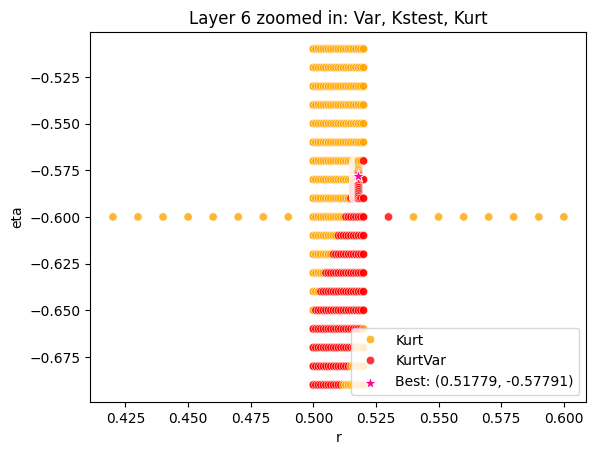

Layer 7
(0.962, -0.91), 50 of 470
(0.964, -0.81), 100 of 520
(0.967, -0.91), 150 of 570
(0.969, -0.81), 200 of 620
(0.972, -0.91), 250 of 670
(0.974, -0.81), 300 of 720
(0.977, -0.91), 350 of 770
(0.979, -0.81), 400 of 820


100%|██████████| 420/420 [00:01<00:00, 290.36it/s]


Finding Minimum after computing 420 CDFs
Iter 1 layer 7 best parameters: ((0.974, -0.9), 0.010258438863615882)
(0.9731, -0.899), 450 of 891
(0.9733, -0.891), 500 of 941
(0.9736, -0.904), 550 of 991
(0.9738, -0.896), 600 of 1041
(0.9741, -0.906), 650 of 1091
(0.9743, -0.898), 700 of 1141
(0.9745, -0.89), 750 of 1191
(0.9748, -0.903), 800 of 1241
(0.975, -0.893), 850 of 1291


100%|██████████| 852/852 [00:03<00:00, 250.17it/s]


Finding Minimum after computing 852 CDFs
Iter 2 layer 7 best parameters: ((0.9738, -0.9), 0.010248647867938443)
(0.97379, -0.90003), 900 of 1300
(0.97379, -0.89993), 950 of 1350
(0.9738, -0.90001), 1000 of 1400
(0.9738, -0.90008), 1050 of 1450
(0.9738, -0.89995), 1100 of 1500
(0.97381, -0.90003), 1150 of 1550
(0.97381, -0.89993), 1200 of 1600


100%|██████████| 911/911 [00:03<00:00, 276.15it/s]
/Users/brandonmarks/Desktop/Research Materials/hierarchical-bayesian-model-validation/utilities/plotting.py:37: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  fig = sns.scatterplot(df, x='r', y='eta', hue='map', palette = fixed_palette, ax=ax, alpha=0.8)


Finding Minimum after computing 911 CDFs
Iter 3 layer 7 best parameters: ((0.97379, -0.9), 0.01024815815633262)


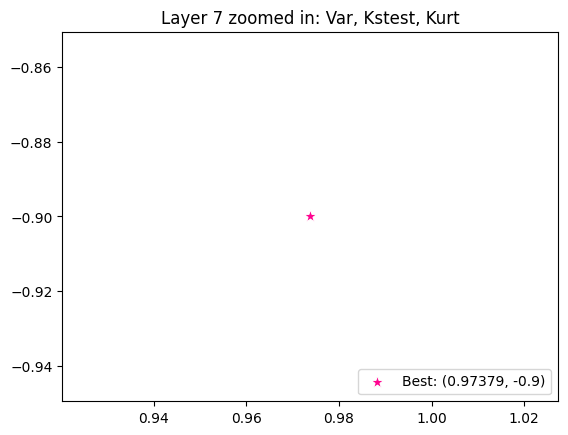

Layer 8
(1.432, -1.23), 50 of 491
(1.434, -1.15), 100 of 541
(1.437, -1.28), 150 of 591
(1.439, -1.2), 200 of 641
(1.441, -1.12), 250 of 691
(1.444, -1.25), 300 of 741
(1.446, -1.17), 350 of 791
(1.449, -1.3), 400 of 841


100%|██████████| 441/441 [00:01<00:00, 275.71it/s]


Finding Minimum after computing 441 CDFs
Iter 1 layer 8 best parameters: ((1.45, -1.22), 0.04682376474786998)
(1.449, -1.221), 450 of 870
(1.4492, -1.211), 500 of 920
(1.4495, -1.224), 550 of 970
(1.4497, -1.216), 600 of 1020
(1.45, -1.228), 650 of 1070
(1.4502, -1.218), 700 of 1120
(1.4504, -1.21), 750 of 1170
(1.4507, -1.223), 800 of 1220
(1.4509, -1.215), 850 of 1270


100%|██████████| 855/855 [00:03<00:00, 281.25it/s]


Finding Minimum after computing 855 CDFs
Iter 2 layer 8 best parameters: ((1.4509, -1.216), 0.04508604065679178)
(1.4509, -1.2161), 900 of 1320
(1.4509, -1.2161), 950 of 1370
(1.4509, -1.2161), 1000 of 1420
(1.4509, -1.2161), 1050 of 1470


100%|██████████| 857/857 [00:02<00:00, 306.74it/s]


Finding Minimum after computing 857 CDFs
Iter 3 layer 8 best parameters: ((1.4509, -1.2159), 0.045043288981819474)


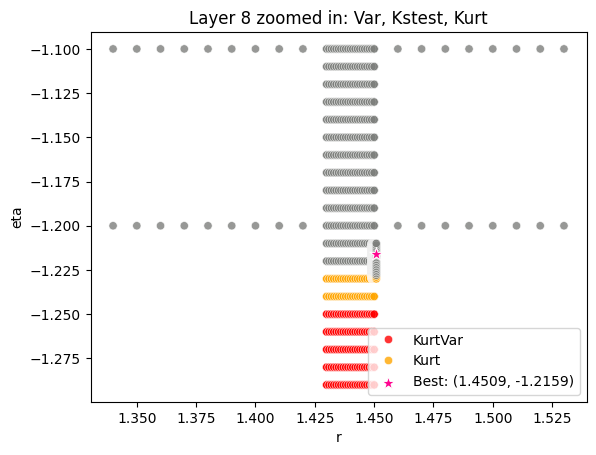

obs_var   var_lower   var_upper    obs_kurt  kurt_lower  kurt_upper  \
layer                                                                           
2      803.473892  751.378924  857.028528    0.094996   -0.097312    0.299754   
3      275.270192  264.590167  286.288690    0.374403    0.219221    0.546058   
4       80.847728   77.046186   84.706154    1.357251    1.030759    1.855357   
5       19.882305   18.762781   21.056150    3.074957    2.230657    5.079245   
6        4.187365    3.884993    4.587161    7.592764    3.861297   29.028659   
7        0.819285    0.747353    0.916054   13.123555    6.050411   48.182214   
8        0.136744    0.117431    0.211746  172.661568    8.088640  756.942474   

       total_samples  initial_r  initial_eta  kstest_stat_initial  ...  \
layer                                                              ...   
2             3180.0       0.42          5.7             0.018069  ...   
3            12720.0       0.51          7.3             0.004615  ...   
4            50880.0       0.44          1.4             0.006270  ...   
5           203520.0       0.47          0.2             0.005236  ...   
6           814080.0       0.51         -0.6             0.004349  ...   
7          3256320.0       0.97         -0.9             0.010413  ...   
8         13025280.0       1.44         -1.2             0.051520  ...   

       iter1_r  iter1_eta  kstest_stat_iter1  iter2_r  iter2_eta  \
layer                                                              
2        0.420       5.68           0.017542   0.4200      5.679   
3        0.509       7.22           0.004263   0.5089      7.211   
4        0.436       1.31           0.005315   0.4354      1.300   
5        0.460       0.12           0.003866   0.4591      0.110   
6        0.517      -0.58           0.003590   0.5178     -0.578   
7        0.974      -0.90           0.010258   0.9738     -0.900   
8        1.450      -1.22           0.046824   1.4509     -1.216   

       kstest_stat_iter2  iter3_r  iter3_eta  kstest_stat_iter3  n_pval_0.05  
layer                                                                         
2               0.017520      NaN        NaN                NaN         6034  
3               0.004221      NaN        NaN                NaN       108666  
4               0.005286      NaN        NaN                NaN        64395  
5               0.003596  0.45910    0.10991           0.003592       144888  
6               0.003542  0.51779   -0.57791           0.003538       152640  
7               0.010249  0.97379   -0.90000           0.010248        18109  
8               0.045086  1.45090   -1.21590           0.045043          894  

[7 rows x 26 columns]

In [ ]:
SKIP_OPTIMIZE_STEP = False
NUM_ITERS = dict(zip(GROUPS, [2]*len(GROUPS)))
NUM_SAMPLES_OPTIMIZE = 2000

if SKIP_OPTIMIZE_STEP:
    master_df['kstest_stat'] = master_df['kstest_stat_initial']
    master_df[f'best_r'] = master_df['initial_r']
    master_df[f'best_eta'] = master_df['initial_eta']
else:
    for group in GROUPS: 
        print(f"{GROUP.capitalize()} {group}")
        sample = group_data_map[group]
        initial_r, initial_eta = master_df.loc[group, 'initial_r'], master_df.loc[group, f'initial_eta']
        r_granularity = 10
        eta_granularity = 10
        for i in range(-1, -5, -1):
            if tuple([round_to_sigfigs(initial_r + 10.**i), initial_eta]) in all_cdfs:
                r_granularity = 10.**i
            if tuple([initial_r, round_to_sigfigs(initial_eta + 10.**i)]) in all_cdfs:
                
                eta_granularity = 10.**i

        for d in range(1, NUM_ITERS[group] + 1):
            if d == 1:
                initial_r, initial_eta = master_df.loc[group, 'initial_r'], master_df.loc[group, f'initial_eta']
            else:
                initial_r, initial_eta = master_df.loc[group, f'iter{d - 1}_r'], master_df.loc[group, f'iter{d - 1}_eta']
            r_granularity = r_granularity * 10.0**(-d+1) 
            eta_granularity = eta_granularity * 10.0**(-d+1) 

            r_range = [round_to_sigfigs(x) for x in np.arange(initial_r - r_granularity, initial_r + r_granularity, r_granularity/10)]
            eta_range = [round_to_sigfigs(x) for x in np.arange(initial_eta - eta_granularity, initial_eta + eta_granularity, eta_granularity/10)]
            simple_add_cdfs(r_range, eta_range, dir = os.path.join(CWD, "groupCDFs"), folder_name=f'{GROUP}{group}', n_samples = NUM_SAMPLES_OPTIMIZE, debug=False, tail_bound=1e-5)
            cdfs_dict = combine_pickles(os.path.join(CWD, "groupCDFs", f'{GROUP}{group}'))
            ksstats, best_param, kstest_stat = gridsearch(sample, cdfs_dict, debug=True)

            temp_df = create_kurt_var_ksstat_df(cdfs_dict)
            temp_df = add_tests_to_df(cdfs_df=temp_df, group=group, var_kurt_df=master_df, ksstats=ksstats)
            group_cdf_df_dict[group] = pd.concat([group_cdf_df_dict[group], temp_df])
            master_df.loc[group, 'best_r'], master_df.loc[group, f'best_eta'] = best_param[0], best_param[1]
            master_df.loc[group, 'kstest_stat_best'] = kstest_stat
            master_df.loc[group, f'iter{d}_r'], master_df.loc[group, f'iter{d}_eta'] = best_param[0], best_param[1]
            master_df.loc[group, f'kstest_stat_iter{d}'] = kstest_stat
            
            print(f"Iter {d} {GROUP} {group} best parameters: {best_param, master_df.loc[group, f'kstest_stat_iter{d}']}")

        temp_df = group_cdf_df_dict[group]
        eps = 0.1
        filtered_df = temp_df[(temp_df['r'] > master_df.loc[group, 'initial_r'] - eps) & 
                        (temp_df['r'] < master_df.loc[group, 'initial_r'] + eps) &
                        (temp_df['eta'] > master_df.loc[group, 'initial_eta'] - eps) &
                        (temp_df['eta'] < master_df.loc[group, 'initial_eta'] + eps)]
        cols = ['pass_var', 'pass_kstest', 'pass_kurt']
        fig = combo_test_plot(filtered_df, cols, 
                              plot_name=f"{GROUP.capitalize()} {group} zoomed in: {', '.join([col[5:].capitalize() for col in cols])}",
                              best_param=(master_df.loc[group, 'best_r'], master_df.loc[group, f'best_eta']))
        fig.figure.savefig(os.path.join(CWD, "plots", f"optimized_full_grid_search_combo_plot_layer{group}.jpg"), bbox_inches = 'tight', dpi=600)
        
master_df['n_pval_0.05'] = master_df.apply(lambda row : find_n_fixed_pval_stat(row.loc['kstest_stat_best'], row.loc['total_samples']), axis = 1)    
master_df[['total_samples', 'initial_r', 'initial_eta', 'kstest_stat_initial', f'best_r', f'best_eta', 'kstest_stat_best', 'n_pval_0.05']].to_csv(os.path.join(CWD, "CSVs", 'optimized_params.csv'))
master_df.to_csv(os.path.join(CWD, "CSVs", 'master_df_optimized.csv'))

master_df = pd.read_csv(os.path.join(CWD, "CSVs", 'master_df_optimized.csv'), index_col = GROUP)
master_df

## Comparing Empirical and Computed CDF/PDF

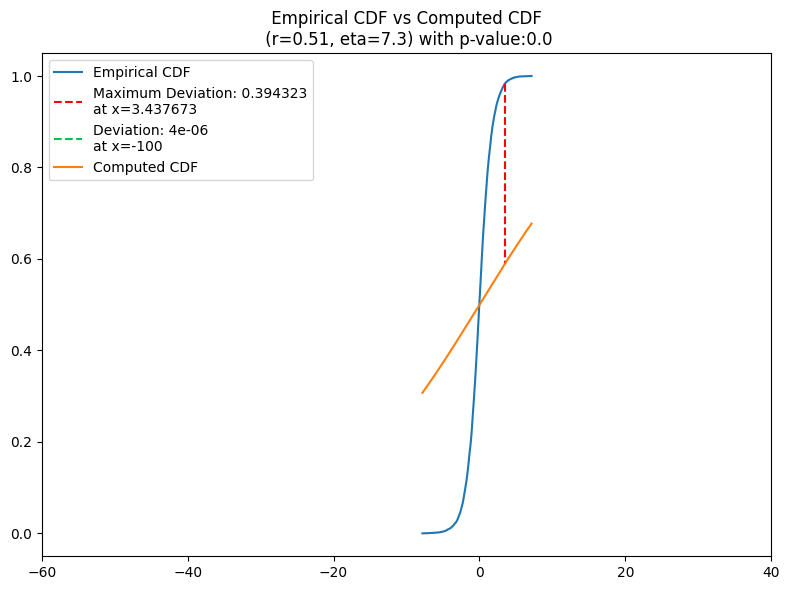

In [15]:
# Example Cell
group = 3
visualize_cdf(sample = sample_prior(1, 1, 10000), 
              all_cdfs = None, 
              params = (master_df.loc[group, 'initial_r'], master_df.loc[group, 'initial_eta']),
              distro = 'gengamma',
              n_samples=200, 
              interval = (-60, 40), 
              provided_loc = -100);

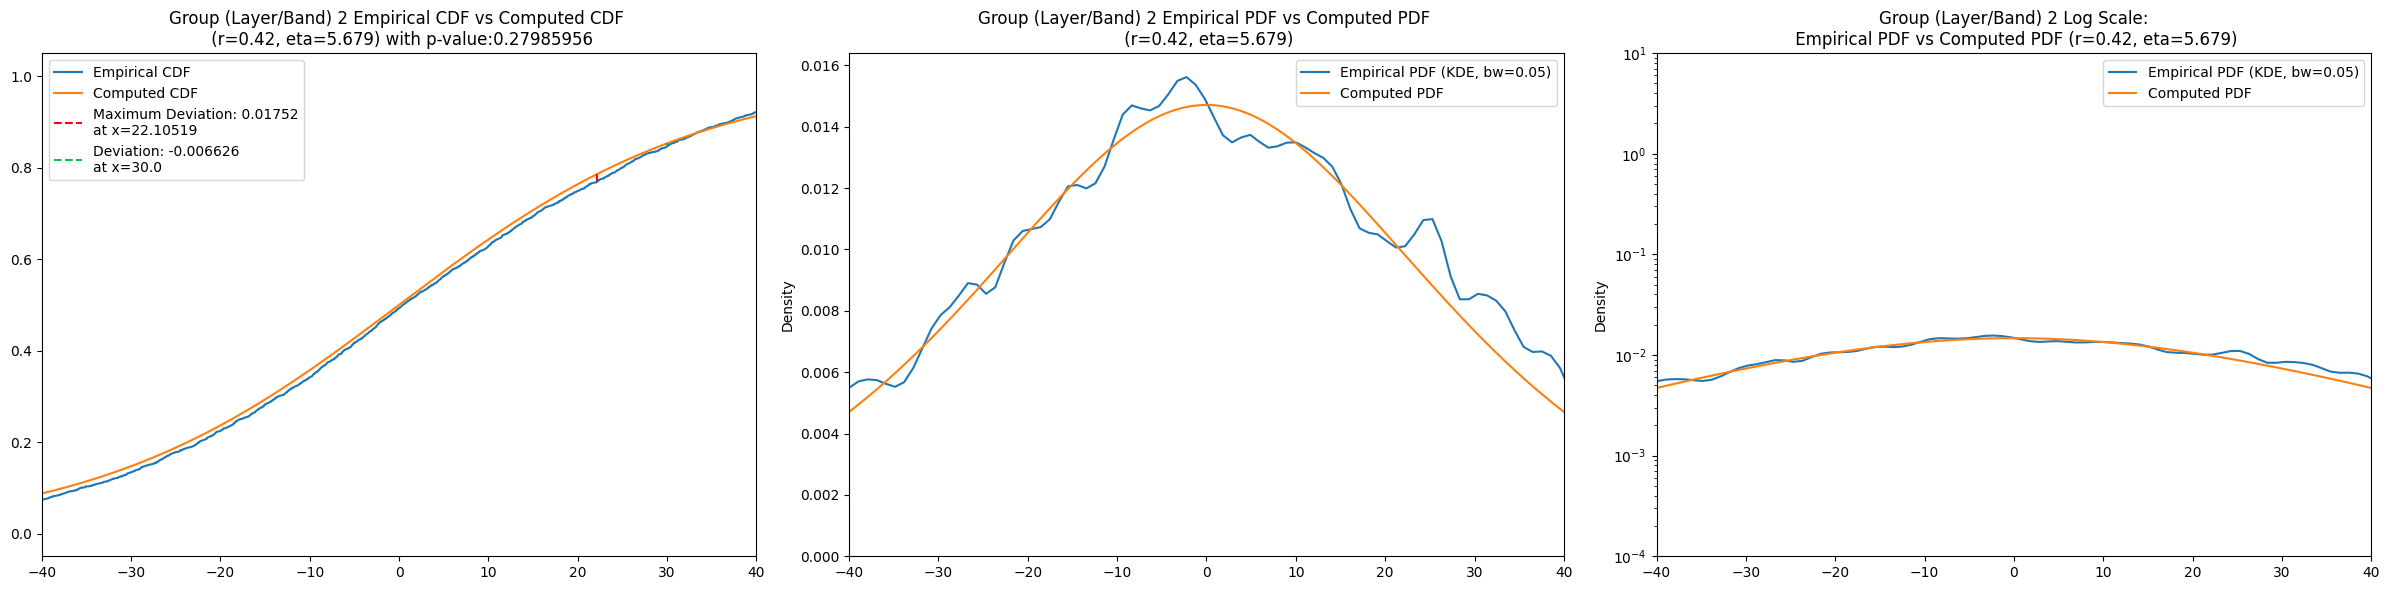

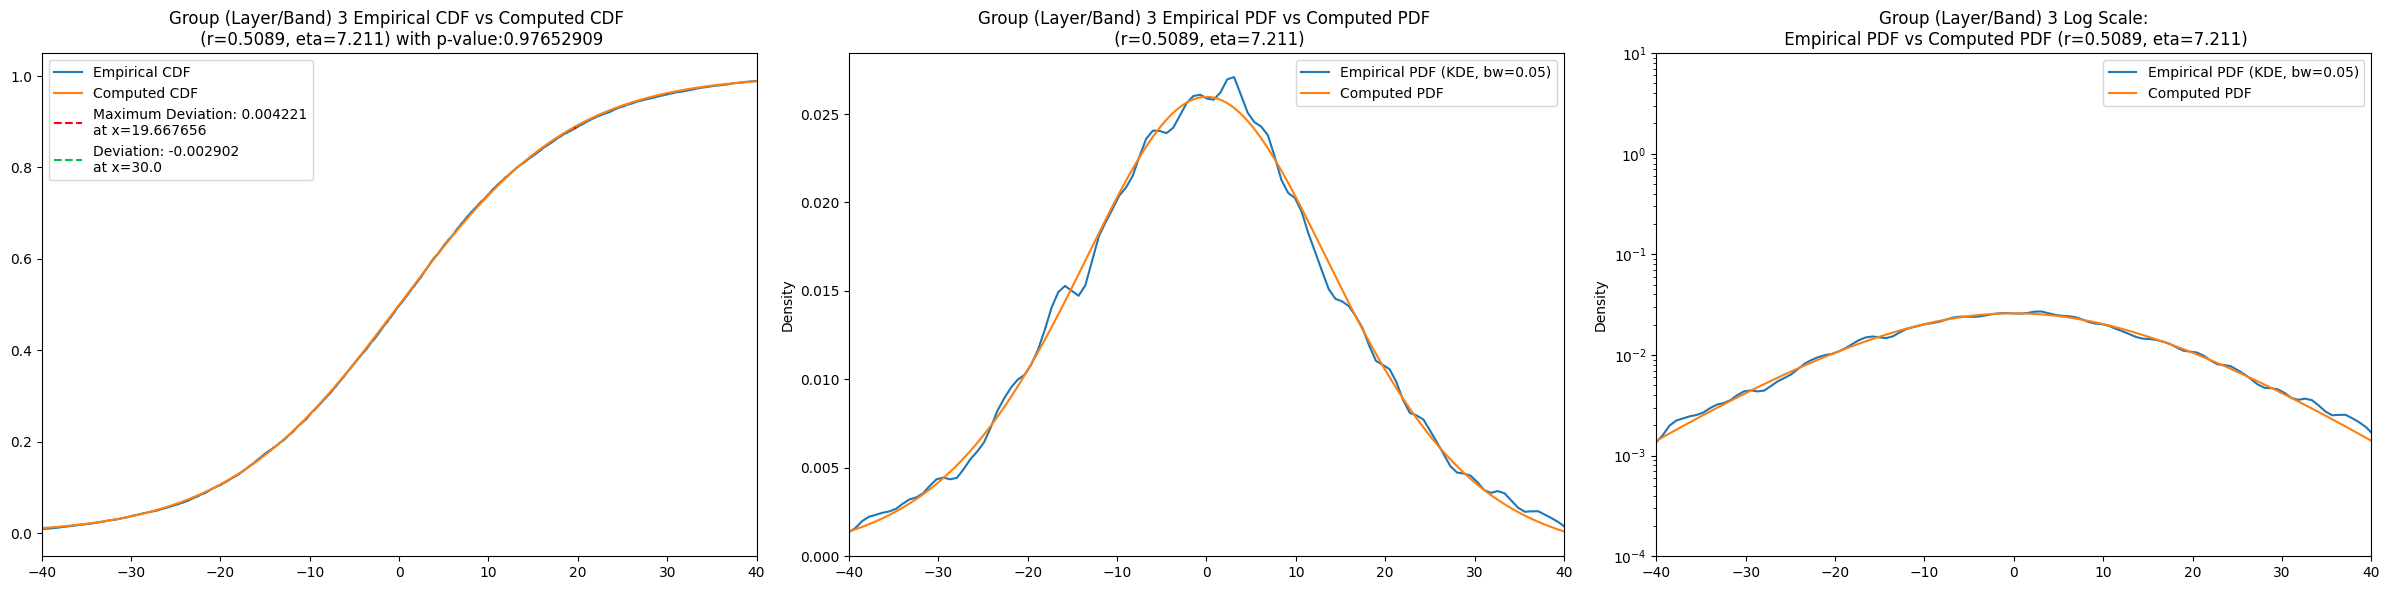

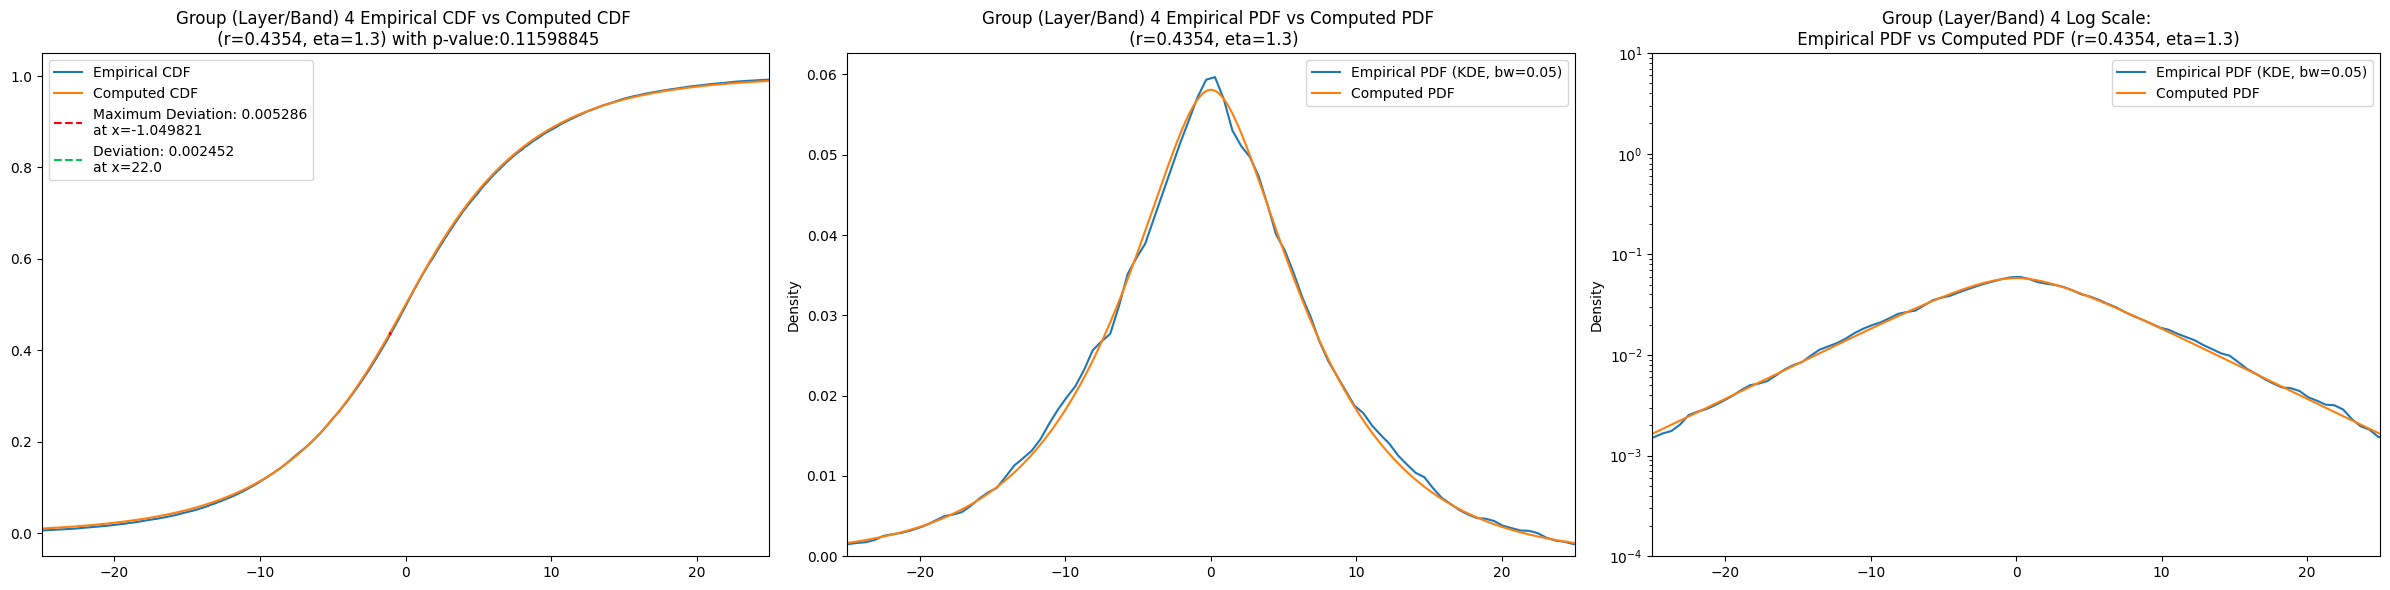

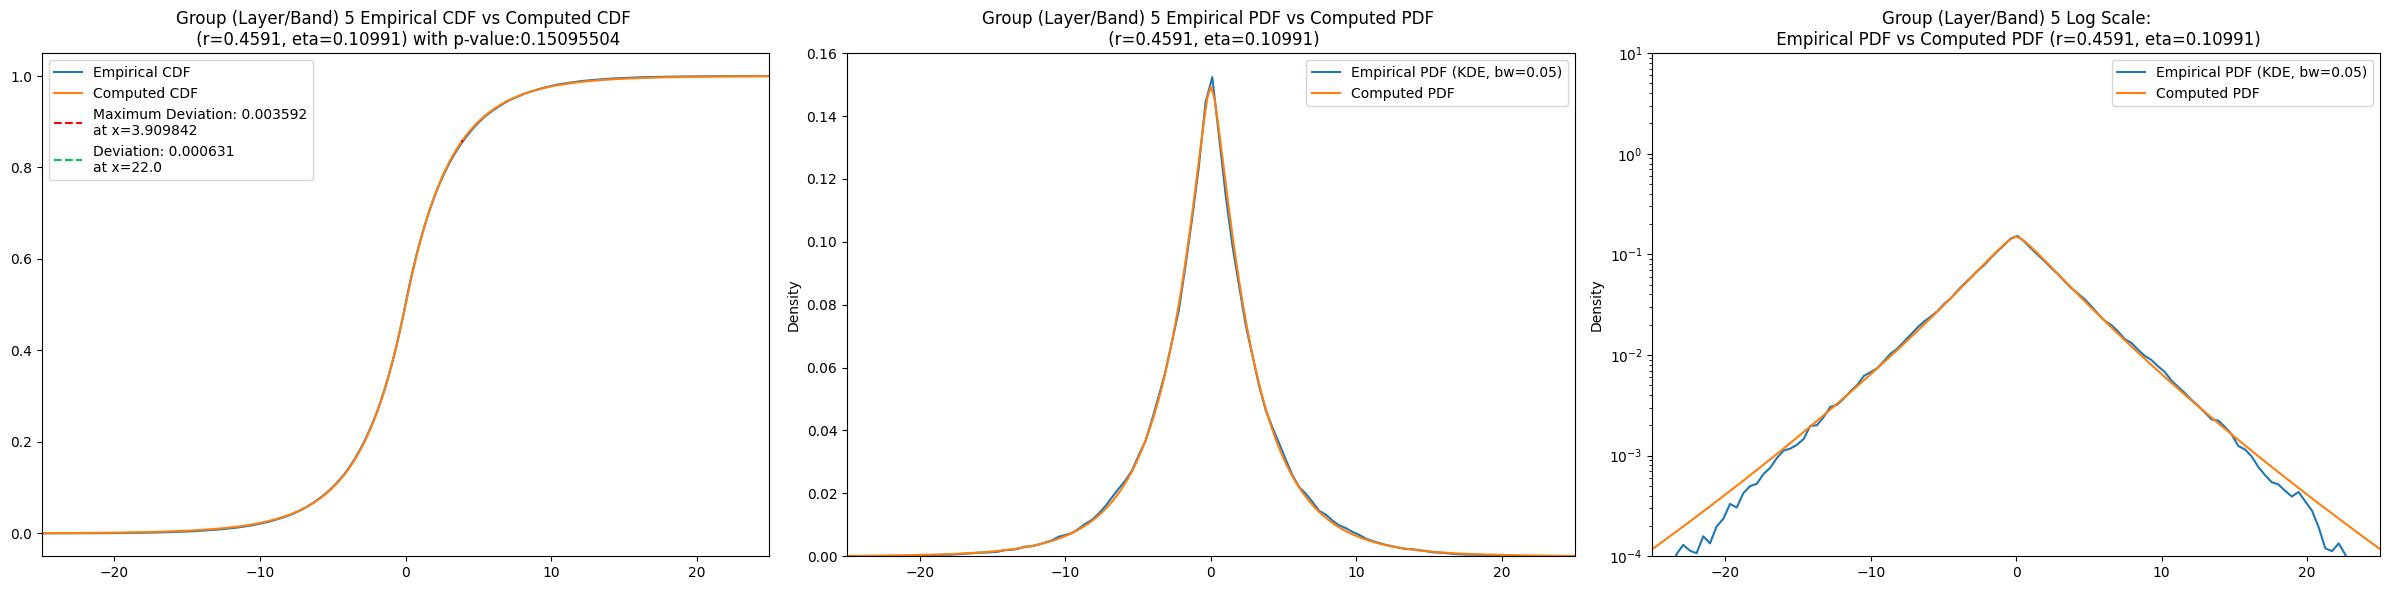

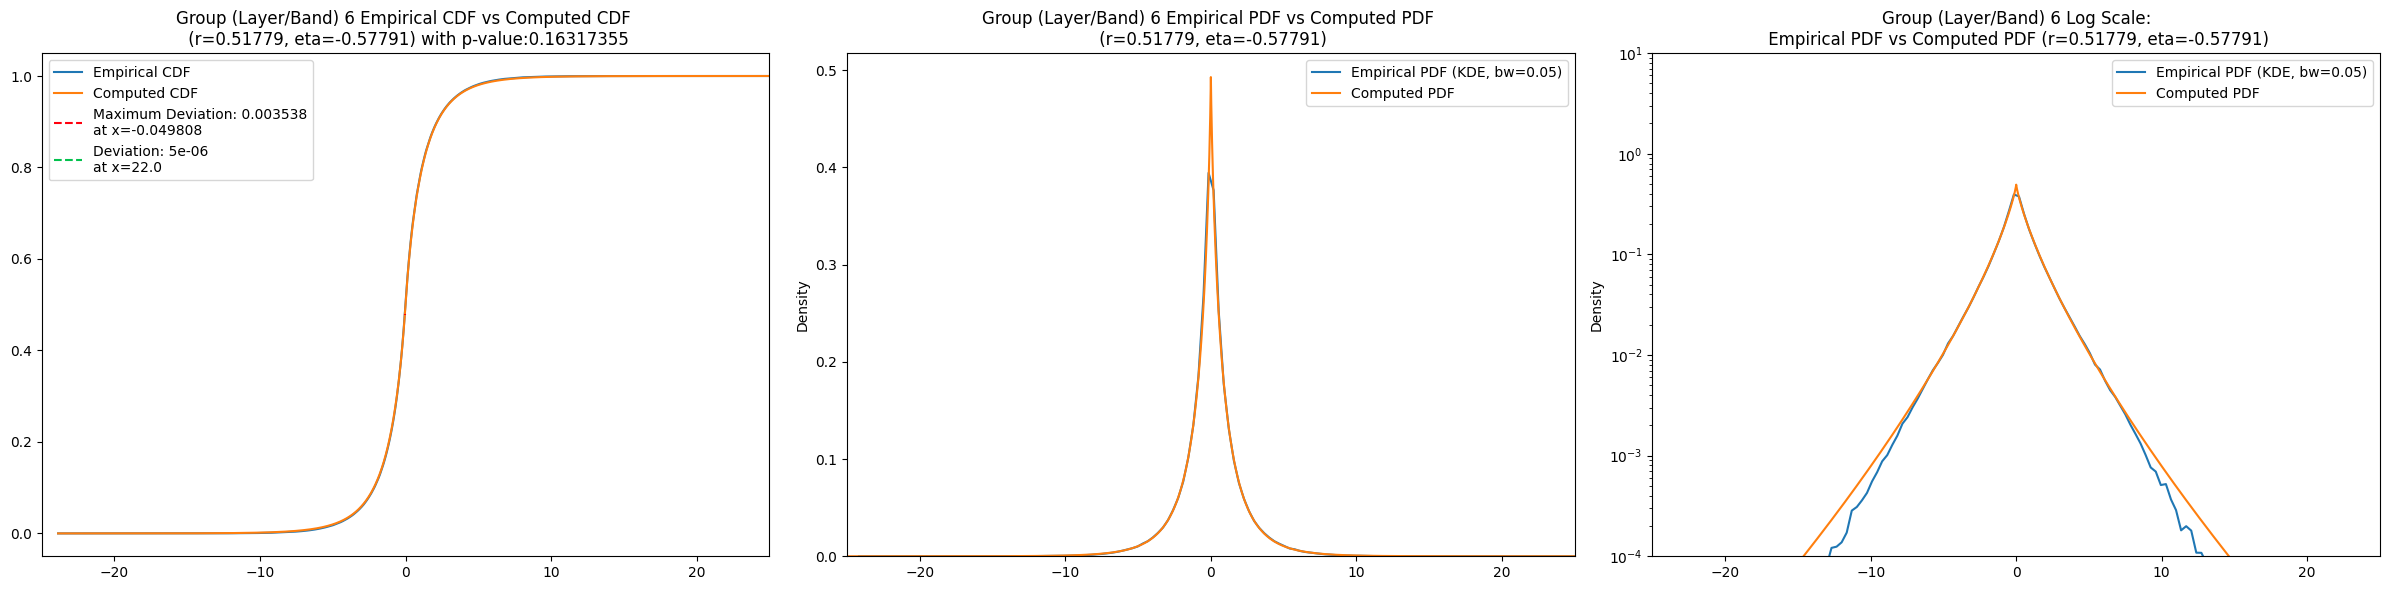

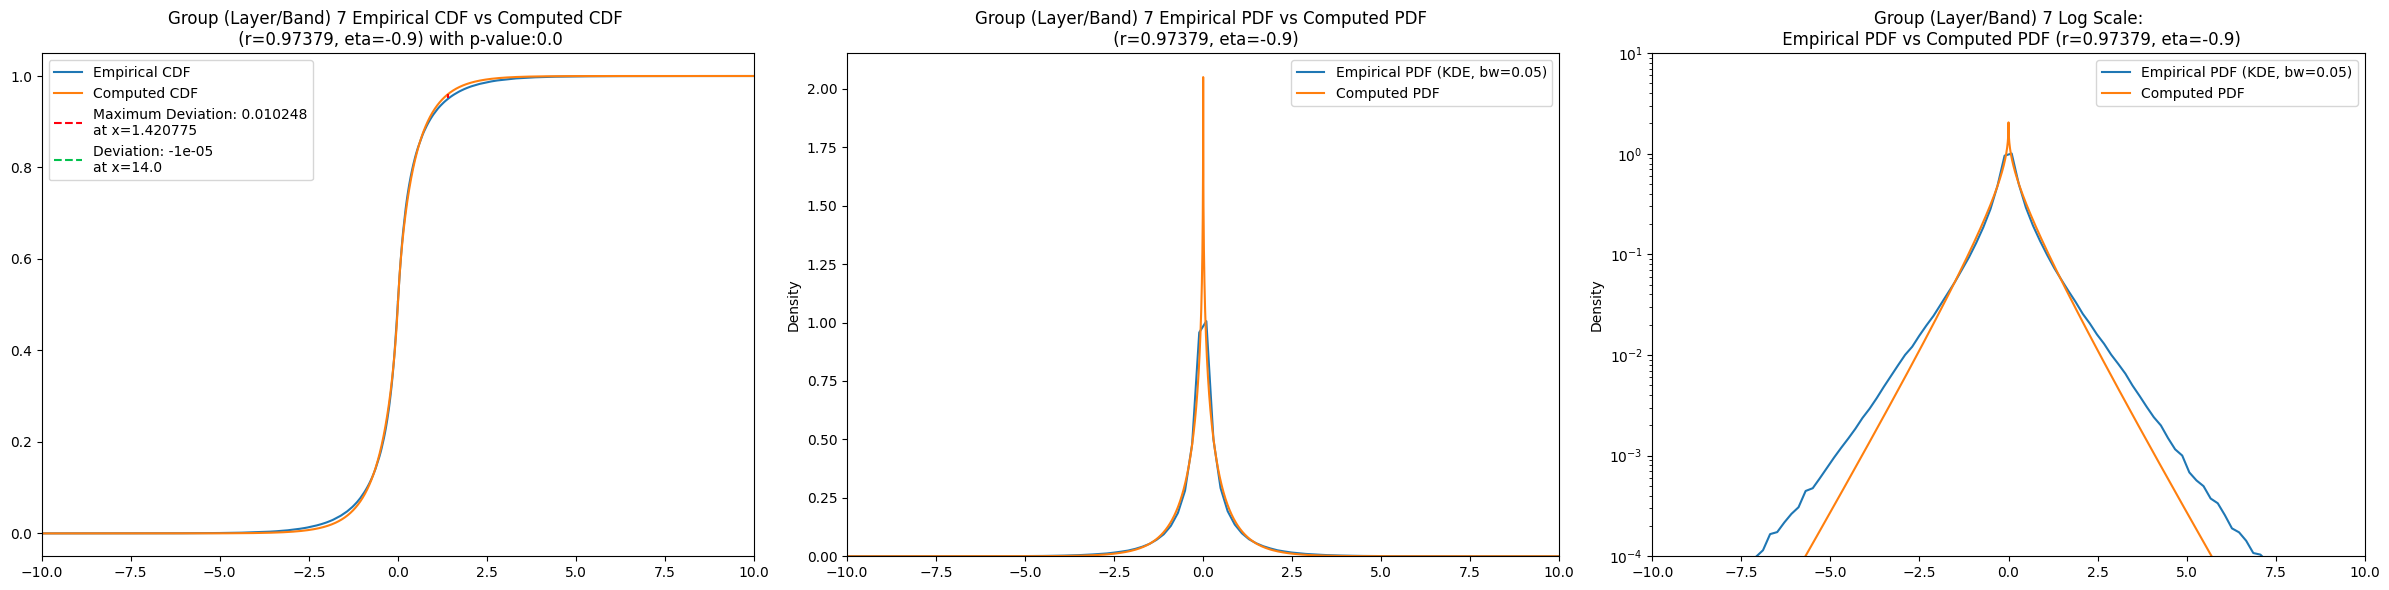

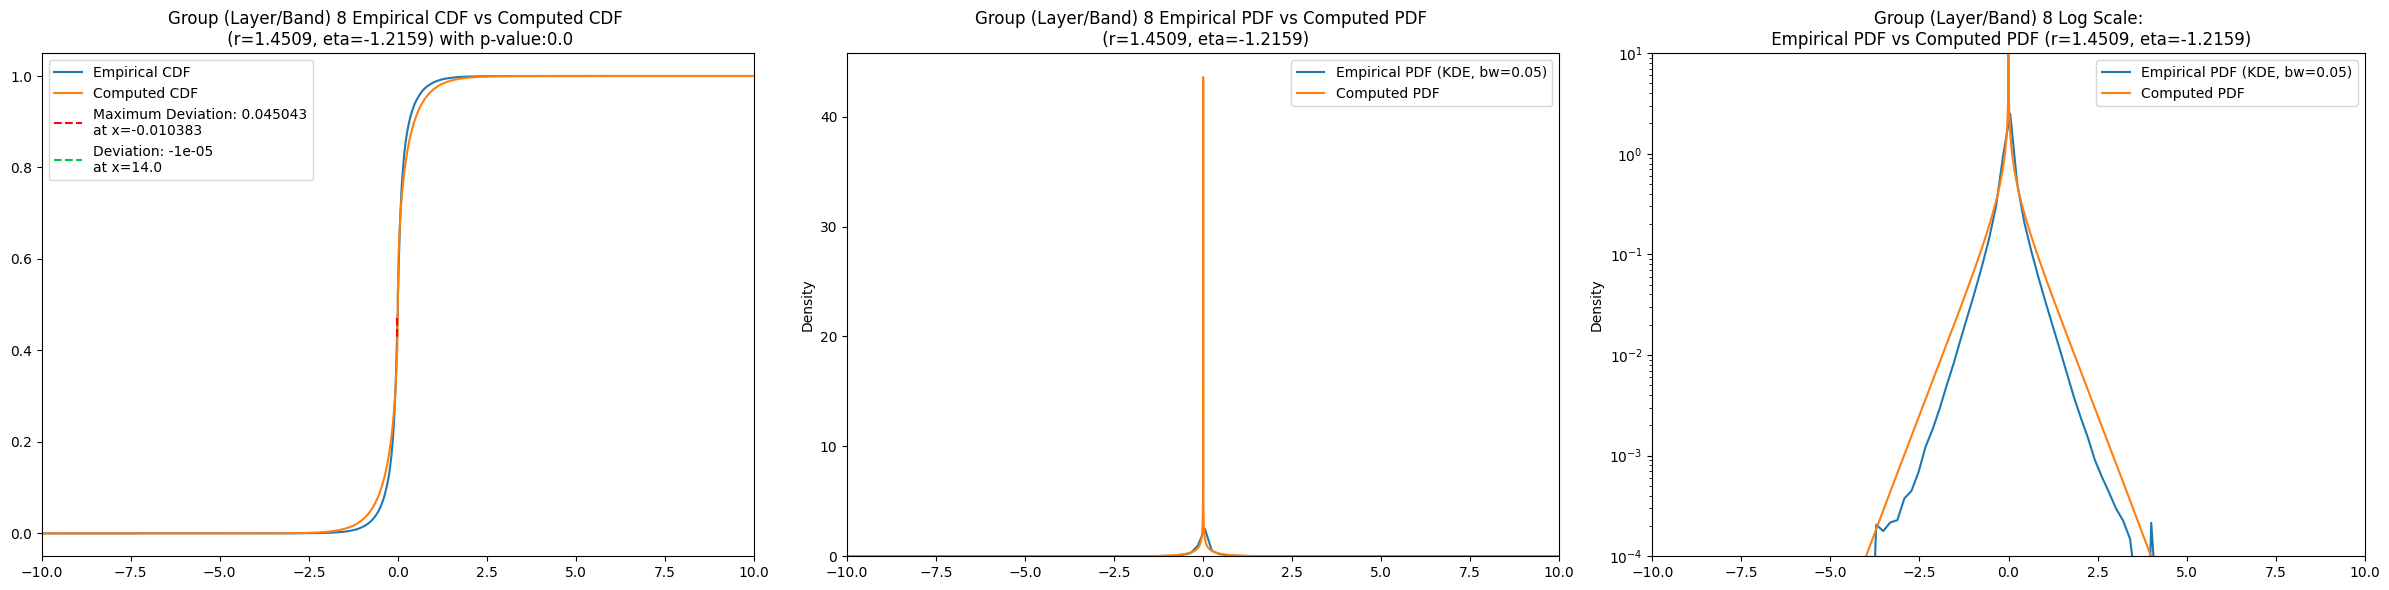

In [16]:
for group in GROUPS:
    group_info = master_df.loc[group]
    best_r = group_info['best_r']
    best_eta = group_info['best_eta']
    fig = visualize_cdf_pdf(sample = group_data_map[group], 
                    params = (best_r, best_eta), 
                    log_scale = True,
                    group = group,
                    interval = (-(40 - group//3.1*15), (40 - group//3.1*15)),
                    provided_loc=(30 - group//3.1*8))
    fig.savefig(os.path.join(CWD, "plots", f'compare_cdf_pdf_layer_{group}.jpg'), bbox_inches = 'tight', dpi = 600)

## Comparing with Gaussian and Laplace

In [17]:
def generate_func(sample, distro, *args, n_samples=200):
    if distro == 'gaussian' or distro == 'normal':
        def var_func(var):
            cdf = scipy.stats.norm(scale=var).cdf
            return compute_ksstat(sample, cdf)
        return var_func
    elif distro == 'laplace':
        def var_func(var):
            cdf = scipy.stats.laplace(scale=var).cdf
            return compute_ksstat(sample, cdf)
        return var_func
    elif distro == 't':
        def var_func(var):
            cdf = scipy.stats.t(df=2, scale=var).cdf
            return compute_ksstat(sample, cdf)
        return var_func
    elif distro == 'prior_r':
        eta = args[0]
        def r_func(r):
            cdf = compute_prior_cdf(r, eta, n_samples=n_samples)
            return compute_ksstat(sample, cdf)
        return r_func
    elif distro == 'prior_eta':
        r = args[0]
        def eta_func(eta):
            cdf = compute_prior_cdf(r, eta, n_samples=n_samples)
            return compute_ksstat(sample, cdf)
        return eta_func
    elif distro == 'prior':
        def r_eta_func(params):
            r = params[0]
            eta = params[1]
            cdf = compute_prior_cdf(r, eta, n_samples=n_samples, debug=False)
            return compute_ksstat(sample, cdf)
        return r_eta_func

    print("Please enter a valid argument for `distro`: 'gaussian', 'laplace', 'prior_r', 'prior_eta', 'prior', 't'")

In [18]:
for group in GROUPS:
    upper_bound = int(1e6)
    norm_result = scipy.optimize.minimize_scalar(generate_func(group_data_map[group], 'gaussian'), method = 'bounded', bounds = (0, upper_bound))
    laplace_result = scipy.optimize.minimize_scalar(generate_func(group_data_map[group], 'laplace'), method = 'bounded', bounds = (0, upper_bound))
    t_result = scipy.optimize.minimize_scalar(generate_func(group_data_map[group], 't'), method = 'bounded', bounds = (0, upper_bound))
    
    master_df.loc[group, 'param_gaussian'] = round_to_sigfigs(norm_result['x'], 6)
    master_df.loc[group, 'kstest_stat_gaussian'] = round_to_sigfigs(norm_result['fun'], 6)
    master_df.loc[group, 'kstest_pval_gaussian'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_gaussian']), 6)

    master_df.loc[group, 'param_laplace'] = round_to_sigfigs(laplace_result['x'], 6)
    master_df.loc[group, 'kstest_stat_laplace'] = round_to_sigfigs(laplace_result['fun'], 6)
    master_df.loc[group, 'kstest_pval_laplace'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_laplace']), 6)

    master_df.loc[group, 'param_laplace'] = round_to_sigfigs(laplace_result['x'], 6)
    master_df.loc[group, 'kstest_stat_laplace'] = round_to_sigfigs(laplace_result['fun'], 6)
    master_df.loc[group, 'kstest_pval_laplace'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_laplace']), 6) 

    master_df.loc[group, 'param_t'] = round_to_sigfigs(t_result['x'], 6)
    master_df.loc[group, 'kstest_stat_t'] = round_to_sigfigs(t_result['fun'], 6)
    master_df.loc[group, 'kstest_pval_t'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_t']), 6) 

    master_df.loc[group, 'kstest_pval_gengamma'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_best']))

master_df.to_csv(os.path.join(CWD, "CSVs", 'master_df.csv'))
master_df = pd.read_csv(os.path.join(CWD, "CSVs", 'master_df.csv'), index_col = GROUP)
master_df

obs_var   var_lower   var_upper    obs_kurt  kurt_lower  kurt_upper  \
layer                                                                           
2      803.473892  751.378924  857.028528    0.094996   -0.097312    0.299754   
3      275.270192  264.590167  286.288690    0.374403    0.219221    0.546058   
4       80.847728   77.046186   84.706154    1.357251    1.030759    1.855357   
5       19.882305   18.762781   21.056150    3.074957    2.230657    5.079245   
6        4.187365    3.884993    4.587161    7.592764    3.861297   29.028659   
7        0.819285    0.747353    0.916054   13.123555    6.050411   48.182214   
8        0.136744    0.117431    0.211746  172.661568    8.088640  756.942474   

       total_samples  initial_r  initial_eta  kstest_stat_initial  ...  \
layer                                                              ...   
2             3180.0       0.42          5.7             0.018069  ...   
3            12720.0       0.51          7.3             0.004615  ...   
4            50880.0       0.44          1.4             0.006270  ...   
5           203520.0       0.47          0.2             0.005236  ...   
6           814080.0       0.51         -0.6             0.004349  ...   
7          3256320.0       0.97         -0.9             0.010413  ...   
8         13025280.0       1.44         -1.2             0.051520  ...   

       param_gaussian  kstest_stat_gaussian  kstest_pval_gaussian  \
layer                                                               
2           27.782300              0.019503          1.755550e-01   
3           16.031400              0.010128          1.460870e-01   
4            8.001070              0.020474          5.852830e-19   
5            3.590200              0.030178         1.856120e-161   
6            1.426190              0.042375          0.000000e+00   
7            0.539656              0.052929          0.000000e+00   
8            0.196027              0.056358          0.000000e+00   

       param_laplace  kstest_stat_laplace  kstest_pval_laplace    param_t  \
layer                                                                       
2          25.439100             0.036392         4.282210e-04  20.752800   
3          14.012900             0.022665         4.151010e-06  11.277100   
4           7.104980             0.014498         1.017140e-09   5.719650   
5           3.138870             0.002344         2.129390e-01   2.574090   
6           1.246800             0.014481        1.041130e-148   1.010540   
7           0.472760             0.025282         0.000000e+00   0.378321   
8           0.172569             0.029152         0.000000e+00   0.137349   

       kstest_stat_t  kstest_pval_t  kstest_pval_gengamma  
layer                                                      
2           0.036305   4.458110e-04          2.798600e-01  
3           0.026410   3.854630e-08          9.765300e-01  
4           0.018489   1.538450e-15          1.159900e-01  
5           0.010570   3.529230e-20          1.043800e-02  
6           0.017941  4.909420e-228          2.818200e-09  
7           0.026440   0.000000e+00         1.760700e-297  
8           0.028140   0.000000e+00          0.000000e+00  

[7 rows x 36 columns]

In [20]:
# def add_metric_tail(metric_name = 'kstest_ratio',  distro = 'gengamma', tail_cutoffs = [0], layers = np.arange(2, 9)):
#     if metric_name == 'kstest_ratio':
#         metric = compute_ksratio
#     elif metric_name == 'kstest_stat':
#         metric = compute_ksstat_tail

#     for tail_cutoff in tail_cutoffs:
#         metrics = []
#         for layer in layers:
#             if distro == 'gengamma':
#                 cdf = all_cdfs[(master_df.loc[layer, 'initial_r'], master_df.loc[layer, 'initial_eta'])]
#             elif distro == 'gaussian':
#                 cdf = scipy.stats.norm(scale = master_df.loc[layer, 'param_gaussian']).cdf
#             elif distro == 'laplace':
#                 cdf = scipy.stats.norm(scale = master_df.loc[layer, 'param_laplace']).cdf
#             elif distro == 't':
#                 cdf = scipy.stats.t(df = 2, scale = master_df.loc[layer, 'param_t']).cdf
#             metrics.append(metric(group_data_map[layer], cdf, tail_cutoff = tail_cutoff))
#         master_df[metric_name + '_' + distro + '_' + f'tail{tail_cutoff}'] = metrics
        
# for group in GROUPS:
#     add_metric_tail('kstest_ratio', distro = 'gengamma', tail_cutoffs= [0,10], layers = np.arange(2, 9))
#     add_metric_tail('kstest_ratio', distro = 'gaussian', tail_cutoffs= [0,10], layers = np.arange(2, 9)) 
#     add_metric_tail('kstest_ratio', distro = 'laplace', tail_cutoffs= [0,10], layers = np.arange(2, 9))
#     add_metric_tail('kstest_ratio', distro = 't', tail_cutoffs= [0,10], layers = np.arange(2, 9))
#     add_metric_tail('kstest_stat', distro = 'gengamma', tail_cutoffs= [2, 10], layers = np.arange(2, 9))

# master_df.to_csv(os.path.join(CWD, "CSVs", 'master_df.csv'))

# master_df = pd.read_csv(os.path.join(CWD, "CSVs", 'master_df.csv'), index_col = GROUP)
# master_df

/Users/brandonmarks/Desktop/Research Materials/hierarchical-bayesian-model-validation/utilities/testing.py:577: RuntimeWarning: divide by zero encountered in divide
  tail_ratios = np.nan_to_num(d[tail_idxs] / tail_vals)
/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: RuntimeWarning: overflow encountered in multiply
  return bound(*args, **kwds)
/Users/brandonmarks/Desktop/Research Materials/hierarchical-bayesian-model-validation/utilities/testing.py:577: RuntimeWarning: divide by zero encountered in divide
  tail_ratios = np.nan_to_num(d[tail_idxs] / tail_vals)
/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: RuntimeWarning: overflow encountered in multiply
  return bound(*args, **kwds)
/Users/brandonmarks/Desktop/Research Materials/hierarchical-bayesian-model-validation/utilities/testing.py:577: RuntimeWarning: divide by zero encountered in divide
  tail_ratios =

obs_var   var_lower   var_upper    obs_kurt  kurt_lower  kurt_upper  \
layer                                                                           
2      803.473892  751.378924  857.028528    0.094996   -0.097312    0.299754   
3      275.270192  264.590167  286.288690    0.374403    0.219221    0.546058   
4       80.847728   77.046186   84.706154    1.357251    1.030759    1.855357   
5       19.882305   18.762781   21.056150    3.074957    2.230657    5.079245   
6        4.187365    3.884993    4.587161    7.592764    3.861297   29.028659   
7        0.819285    0.747353    0.916054   13.123555    6.050411   48.182214   
8        0.136744    0.117431    0.211746  172.661568    8.088640  756.942474   

       total_samples  initial_r  initial_eta  kstest_stat_initial  ...  \
layer                                                              ...   
2             3180.0       0.42          5.7             0.018069  ...   
3            12720.0       0.51          7.3             0.004615  ...   
4            50880.0       0.44          1.4             0.006270  ...   
5           203520.0       0.47          0.2             0.005236  ...   
6           814080.0       0.51         -0.6             0.004349  ...   
7          3256320.0       0.97         -0.9             0.010413  ...   
8         13025280.0       1.44         -1.2             0.051520  ...   

        kstest_ratio_gengamma_tail0  kstest_ratio_gengamma_tail10  \
layer                                                               
2                  (0.1239, 1.0126)              (0.1239, 1.0126)   
3                  (0.25381, 1.016)              (0.25381, 1.016)   
4                (0.098794, 1.0029)            (0.098794, 1.0029)   
5                 (0.28817, 3.9814)             (0.28817, 3.9814)   
6                 (0.37732, 1.0407)             (0.37732, 1.0407)   
7             (0.95921, 15312000.0)         (0.99998, 15312000.0)   
8      (0.32023, 962020000000000.0)      (1.0, 962020000000000.0)   

             kstest_ratio_gaussian_tail0       kstest_ratio_gaussian_tail10  \
layer                                                                         
2                       (0.9368, 1.9545)                   (0.9368, 1.9545)   
3                      (0.96671, 76.943)                  (0.96671, 76.943)   
4                    (0.93633, 391120.0)                (0.97872, 391120.0)   
5      (0.90723, 1.8721999999999998e+35)  (0.98075, 1.8721999999999998e+35)   
6                  (0.87959, 3.0205e+57)              (0.99905, 3.0205e+57)   
7       (0.8501, 6.528000000000002e+269)  (0.99998, 6.528000000000002e+269)   
8                         (0.83653, inf)                         (1.0, inf)   

             kstest_ratio_laplace_tail0        kstest_ratio_laplace_tail10  \
layer                                                                        
2                     (0.95089, 7.3557)                  (0.95089, 7.3557)   
3                     (0.96151, 2839.9)                  (0.96151, 2839.9)   
4                (0.95756, 119260000.0)             (0.95756, 119260000.0)   
5                 (0.95007, 1.8763e+47)              (0.97884, 1.8763e+47)   
6      (0.9364, 2.0407000000000003e+76)  (0.99905, 2.0407000000000003e+76)   
7                        (0.90641, inf)                     (0.99998, inf)   
8                        (0.89532, inf)                         (1.0, inf)   

       kstest_ratio_t_tail0  kstest_ratio_t_tail10  \
layer                                                
2          (0.015521, 1.04)       (0.015521, 1.04)   
3       (0.0074015, 1.1147)    (0.0074015, 1.1147)   
4        (0.003275, 1.0744)     (0.003275, 1.0176)   
5        (0.006972, 1.0662)     (0.006972, 1.0104)   
6        (0.011194, 1.2183)     (0.011194, 1.0041)   
7        (0.037871, 1.5063)     (0.037871, 1.0006)   
8        (0.061503, 1.7144)         (0.37126, 1.0)   

       kstest_stat_gengamma_tail2  kstest_stat_gengamma_tail10  
layer                   

# Results

In [15]:
import pandas as pd
import git
from pathlib import Path
import os
DATA_NAME = 'approx1e5-pastis-wavelet-gray' # size-name-transform-channel
ROOT_DIR = Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
path_dict = dict(zip(['size', 'name', 'transform', 'channel'], DATA_NAME.split("-")))
CWD = os.path.join(ROOT_DIR, os.path.join("results", "case-studies", path_dict['name'], path_dict['transform'], path_dict['size'], path_dict['channel']))
assert CWD == os.getcwd()
Path(os.path.join(CWD, "CSVs")).mkdir(exist_ok=True)
Path(os.path.join(CWD, "plots")).mkdir(exist_ok=True)
Path(os.path.join(CWD, "cache")).mkdir(exist_ok=True)
Path(os.path.join(CWD, "groupCDFs")).mkdir(exist_ok=True)

GROUP = 'layer' if path_dict['transform'] == 'wavelet' else ('band' if path_dict['transform'] == 'fourier' else 'error')
CWD


master_df = pd.read_csv(os.path.join(CWD, "CSVs", 'master_df.csv'), index_col = GROUP)

In [16]:
master_df.filter(regex='total_samples|kstest_stat.*')
#master_df.filter(regex='total_samples|param.*')
# master_df.filter(regex='.*gaussian')
#master_df.filter(regex='kstest_stat_.*[\_(tail\d)]')
#master_df.filter(regex='.*_tail\d\d?')
#master_df.filter(regex='.*_t_.*')


total_samples  kstest_stat_initial  kstest_stat_cutoff_0.05  \
layer                                                                
2             3180.0             0.018069                 0.024030   
3            12720.0             0.004615                 0.012029   
4            50880.0             0.006270                 0.006018   
5           203520.0             0.005236                 0.003010   
6           814080.0             0.004349                 0.001505   
7          3256320.0             0.010413                 0.000753   
8         13025280.0             0.051520                 0.000376   

       kstest_stat_eta0  kstest_stat_best  kstest_stat_iter1  \
layer                                                          
2              0.060346          0.017520           0.017542   
3              0.037012          0.004221           0.004263   
4              0.023319          0.005286           0.005315   
5              0.005653          0.003592           0.003866   
6              0.020507          0.003538           0.003590   
7              0.082284          0.010248           0.010258   
8              0.227351          0.045043           0.046824   

       kstest_stat_iter2  kstest_stat_iter3  kstest_stat_gaussian  \
layer                                                               
2               0.017520                NaN              0.019503   
3               0.004221                NaN              0.010128   
4               0.005286                NaN              0.020474   
5               0.003596           0.003592              0.030178   
6               0.003542           0.003538              0.042375   
7               0.010249           0.010248              0.052929   
8               0.045086           0.045043              0.056358   

       kstest_stat_laplace  kstest_stat_t  kstest_stat_gengamma_tail2  \
layer                                                                   
2                 0.036392       0.036305                    0.018069   
3                 0.022665       0.026410                    0.004615   
4                 0.014498       0.018489                    0.005812   
5                 0.002344       0.010570                    0.003322   
6                 0.014481       0.017941                    0.002538   
7                 0.025282       0.026440                    0.008446   
8                 0.029152       0.028140                    0.002504   

       kstest_stat_gengamma_tail10  
layer                               
2                         0.018069  
3                         0.003824  
4                         0.005487  
5                         0.001374  
6                         0.000984  
7                         0.000030  
8                         0.000010

In [23]:
# group_cdf_df_dict = pd.read_pickle(os.path.join(CWD, "cache", "group_cdf_df_dict_full.pickle"))

# for group in GROUPS:
#     cols = ['pass_var', 'pass_kstest', 'pass_kurt']
#     fig = combo_test_plot(group_cdf_df_dict[group], cols, 
#                             plot_name=f"{GROUP.capitalize()} {group}: {', '.join([col[5:].capitalize() for col in cols])}", 
#                             target_var = master_df.loc[group, 'obs_var'],
#                             best_param = (master_df.loc[group, 'initial_r'], master_df.loc[group, 'initial_eta']))
#     fig.figure.savefig(os.path.join(CWD, "plots", f"full_grid_search_combo_plot_layer{group}.jpg"), bbox_inches = 'tight', dpi=600)

EOFError: Ran out of input